In [1]:
import pandas as pd
import pandasql as ps
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("../data/EXTR_RPSale.csv")

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
q1 = ("""
SELECT * 
FROM df
WHERE DocumentDate like "%2019"
""")
df2019 =ps.sqldf(q1)

In [ ]:
df2019.head()

In [ ]:
# df2019.to_csv('../references/df2019',index=False)

In [2]:
df2019 = pd.read_csv("../references/df2019.csv")
df2019.head()

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,...,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning
0,3027422,213043,120,12/20/2019,560000,20191226000848,,,,,...,11,6,3,N,N,N,N,1,8,
1,3002257,940652,630,07/22/2019,435000,20190730001339,,,,,...,11,6,3,N,N,N,N,1,8,
2,2999169,919715,200,07/08/2019,192000,20190712001080,,,,,...,3,2,3,N,N,N,N,1,3,
3,2980648,797320,2320,03/27/2019,540000,,,,,,...,3,6,3,N,N,N,N,1,8,
4,3013394,663990,178,10/02/2019,0,20191002000875,,,,,...,3,6,15,N,N,N,N,19,8,18 31 51 52


In [3]:
df = pd.read_csv("../data/EXTR_LookUp.csv")
list(df['LUDescription'][df['LUType']==1])

['LAND ONLY                                         ',
 'Land with new building                            ',
 'Household, single family units                    ',
 'Multiple family residence (Residential, 2-4 units)',
 'Multiple family residence (Residential, 5+ units) ',
 'Residential condominiums                          ',
 'Mobile home parks or courts                       ',
 'Hotels/motels                                     ',
 'Institutional lodging                             ',
 'All other residential not elsewhere coded         ',
 'Vacation and cabin                                ',
 'LAND WITH NEW BUILDING                            ',
 'Food and kindred products                         ',
 'Textile mill products                             ',
 'Apparel & other finished products                 ',
 'Lumber and wood products (except furniture)       ',
 'Furniture and fixtures                            ',
 'Paper and allied products                         ',
 'Printing

In [4]:
df[df['LUType']==1].head(8)

,LUType,LUItem,LUDescription
0,1,1,LAND ONLY ...
1,1,10,Land with new building ...
2,1,11,"Household, single family units ..."
3,1,12,"Multiple family residence (Residential, 2-4 un..."
4,1,13,"Multiple family residence (Residential, 5+ uni..."
5,1,14,Residential condominiums ...
6,1,15,Mobile home parks or courts ...
7,1,16,Hotels/motels ...


In [5]:
q2 = ("""
SELECT * 
FROM df2019
WHERE (PropertyType = 11 or PropertyType = 12 or PropertyType = 13 or PropertyType = 14) and SalePrice > 0
""")
dfresidence =ps.sqldf(q2)
dfresidence

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,...,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning
0,3027422,213043,120,12/20/2019,560000,20191226000848,,,,,...,11,6,3,N,N,N,N,1,8,
1,3002257,940652,630,07/22/2019,435000,20190730001339,,,,,...,11,6,3,N,N,N,N,1,8,
2,3025919,56525,340,12/12/2019,311000,20191217001069,,,,,...,14,2,3,N,N,N,N,1,3,
3,3012934,615490,10,09/24/2019,775000,20190930002488,,,,,...,11,6,3,N,N,N,N,1,8,
4,2982060,347050,40,04/04/2019,648500,,,,,,...,11,6,3,N,N,N,N,1,8,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22778,3012217,231430,740,09/16/2019,700988,20190926001460,,,,,...,11,6,3,N,N,N,N,1,8,
22779,3009227,192300,170,09/03/2019,1550000,20190909000838,,,,,...,11,6,3,N,N,N,N,1,8,
22780,3001420,757820,400,07/19/2019,930000,20190726000178,,,,,...,11,6,3,N,N,N,N,1,8,
22781,2998779,143800,420,07/09/2019,695000,20190711000444,,,,,...,11,6,3,N,N,N,N,1,8,


In [6]:
dfresidence.columns

Index(['ExciseTaxNbr', 'Major', 'Minor', 'DocumentDate', 'SalePrice',
       'RecordingNbr', 'Volume', 'Page', 'PlatNbr', 'PlatType', 'PlatLot',
       'PlatBlock', 'SellerName', 'BuyerName', 'PropertyType', 'PrincipalUse',
       'SaleInstrument', 'AFForestLand', 'AFCurrentUseLand', 'AFNonProfitUse',
       'AFHistoricProperty', 'SaleReason', 'PropertyClass', 'SaleWarning'],
      dtype='object')

In [7]:
dfresidence['MajorMinor'] = dfresidence ['Major'].astype(str)+'-'+dfresidence ['Minor'].astype(str)
dfResBldg  = pd.read_csv("../data/EXTR_ResBldg.csv", encoding='latin-1')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
dfResBldg['MajorMinor'] =dfResBldg ['Major'].astype(str)+'-'+dfResBldg ['Minor'].astype(str)


In [9]:
df_final = pd.merge(dfresidence,dfResBldg,how='left', on = ['MajorMinor'])
df_final.columns

Index(['ExciseTaxNbr', 'Major_x', 'Minor_x', 'DocumentDate', 'SalePrice',
       'RecordingNbr', 'Volume', 'Page', 'PlatNbr', 'PlatType', 'PlatLot',
       'PlatBlock', 'SellerName', 'BuyerName', 'PropertyType', 'PrincipalUse',
       'SaleInstrument', 'AFForestLand', 'AFCurrentUseLand', 'AFNonProfitUse',
       'AFHistoricProperty', 'SaleReason', 'PropertyClass', 'SaleWarning',
       'MajorMinor', 'Major_y', 'Minor_y', 'BldgNbr', 'NbrLivingUnits',
       'Address', 'BuildingNumber', 'Fraction', 'DirectionPrefix',
       'StreetName', 'StreetType', 'DirectionSuffix', 'ZipCode', 'Stories',
       'BldgGrade', 'BldgGradeVar', 'SqFt1stFloor', 'SqFtHalfFloor',
       'SqFt2ndFloor', 'SqFtUpperFloor', 'SqFtUnfinFull', 'SqFtUnfinHalf',
       'SqFtTotLiving', 'SqFtTotBasement', 'SqFtFinBasement',
       'FinBasementGrade', 'SqFtGarageBasement', 'SqFtGarageAttached',
       'DaylightBasement', 'SqFtOpenPorch', 'SqFtEnclosedPorch', 'SqFtDeck',
       'HeatSystem', 'HeatSource', 'BrickStone', 

In [10]:
df_final = df_final[['MajorMinor','SalePrice','PropertyType','NbrLivingUnits','Address','BuildingNumber','StreetName', 'StreetType','ZipCode','Stories','BldgGrade', 'BldgGradeVar', 'SqFt1stFloor', 'SqFtHalfFloor',
       'SqFt2ndFloor', 'SqFtUpperFloor', 'SqFtUnfinFull',
       'SqFtTotLiving', 'SqFtTotBasement', 'SqFtFinBasement',
       'FinBasementGrade', 'SqFtGarageBasement', 'SqFtGarageAttached',
       'DaylightBasement', 'SqFtOpenPorch', 'SqFtEnclosedPorch', 'SqFtDeck',
       'HeatSystem', 'HeatSource', 'ViewUtilization', 'Bedrooms',
       'BathHalfCount', 'Bath3qtrCount', 'BathFullCount', 'FpSingleStory',
       'FpMultiStory', 'FpFreestanding', 'YrBuilt',
       'YrRenovated','Condition']]

In [11]:
df_final

,MajorMinor,SalePrice,PropertyType,NbrLivingUnits,Address,BuildingNumber,StreetName,StreetType,ZipCode,Stories,...,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,YrBuilt,YrRenovated,Condition
0,213043-120,560000,11,1.0,27033 NE DOROTHY ST 98019,27033,DOROTHY,ST,98019,1.0,...,3.0,0.0,0.0,2.0,1.0,0.0,0.0,1989.0,0.0,3.0
1,940652-630,435000,11,1.0,22848 SE 264TH CT 98038,22848,264TH,CT,98038,2.0,...,3.0,0.0,2.0,1.0,0.0,1.0,0.0,1994.0,0.0,3.0
2,56525-340,311000,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,615490-10,775000,11,1.0,10322 12TH AVE NW 98177,10322,12TH,AVE,98177,1.0,...,4.0,0.0,1.0,1.0,1.0,0.0,0.0,1947.0,0.0,5.0
4,347050-40,648500,11,1.0,26034 231ST PL SE,26034,231ST,PL,NaN,2.0,...,5.0,1.0,0.0,2.0,1.0,0.0,0.0,2005.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22929,231430-740,700988,11,1.0,15748 143RD AVE SE 98058,15748,143RD,AVE,98058,2.0,...,5.0,0.0,1.0,2.0,0.0,1.0,0.0,1998.0,0.0,3.0
22930,192300-170,1550000,11,1.0,9400 SE 47TH ST 98040,9400,47TH,ST,98040,2.0,...,3.0,1.0,1.0,3.0,1.0,1.0,0.0,1999.0,0.0,3.0
22931,757820-400,930000,11,1.0,3703 40TH AVE SW 98116,3703,40TH,AVE,98116,1.0,...,3.0,0.0,0.0,2.0,0.0,1.0,0.0,1948.0,0.0,5.0
22932,143800-420,695000,11,1.0,16309 SE 138TH PL,16309,138TH,PL,NaN,2.0,...,4.0,1.0,0.0,2.0,1.0,0.0,0.0,2014.0,0.0,3.0


In [12]:
df_final = df_final.dropna(subset=['Address'])


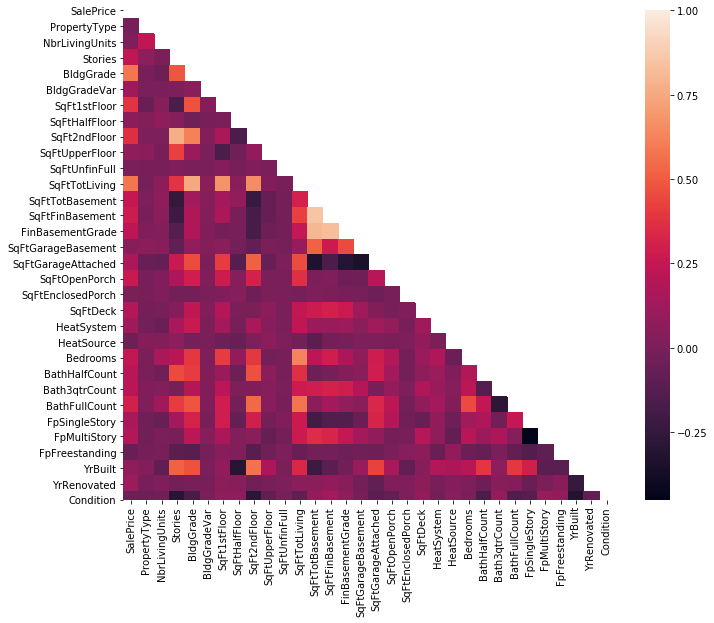

In [13]:
corr = df_final.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

fig1, ax1 = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, ax=ax1)

In [14]:
dfParcel  = pd.read_csv("../data/EXTR_Parcel.csv", encoding='latin-1')
dfParcel['MajorMinor'] = dfParcel['Major'].astype(str)+'-'+dfParcel['Minor'].astype(str)
dfParcel.columns

Index(['Major', 'Minor', 'PropName', 'PlatName', 'PlatLot', 'PlatBlock',
       'Range', 'Township', 'Section', 'QuarterSection', 'PropType', 'Area',
       'SubArea', 'SpecArea', 'SpecSubArea', 'DistrictName', 'LevyCode',
       'CurrentZoning', 'HBUAsIfVacant', 'HBUAsImproved', 'PresentUse',
       'SqFtLot', 'WaterSystem', 'SewerSystem', 'Access', 'Topography',
       'StreetSurface', 'RestrictiveSzShape', 'InadequateParking',
       'PcntUnusable', 'Unbuildable', 'MtRainier', 'Olympics', 'Cascades',
       'Territorial', 'SeattleSkyline', 'PugetSound', 'LakeWashington',
       'LakeSammamish', 'SmallLakeRiverCreek', 'OtherView', 'WfntLocation',
       'WfntFootage', 'WfntBank', 'WfntPoorQuality', 'WfntRestrictedAccess',
       'WfntAccessRights', 'WfntProximityInfluence', 'TidelandShoreland',
       'LotDepthFactor', 'TrafficNoise', 'AirportNoise', 'PowerLines',
       'OtherNuisances', 'NbrBldgSites', 'Contamination', 'DNRLease',
       'AdjacentGolfFairway', 'AdjacentGreenbelt', 

In [15]:
dfParcel = dfParcel[['MajorMinor','WfntLocation','SqFtLot','TrafficNoise', 'AirportNoise', 'PowerLines','OtherNuisances']]

In [67]:
dfAll = pd.merge(df_final,dfParcel,how='left', on = ['MajorMinor'])
dfAll['WfntLocation'].describe()

count    19911.000000
mean         0.110090
std          0.882803
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          9.000000
Name: WfntLocation, dtype: float64

In [66]:
dfAll.describe()

,SalePrice,PropertyType,NbrLivingUnits,Stories,BldgGrade,BldgGradeVar,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,...,FpSingleStory,FpMultiStory,FpFreestanding,YrBuilt,YrRenovated,Condition,WfntLocation,SqFtLot,TrafficNoise,AirportNoise
count,1.991100e+04,19911.000000,19911.000000,19911.000000,19911.00000,19911.000000,19911.000000,19911.000000,19911.000000,19911.000000,...,19911.000000,19911.000000,19911.000000,19911.000000,19911.000000,19911.000000,19911.000000,1.991100e+04,19911.000000,19911.0
mean,7.998140e+05,11.023705,1.016524,1.517779,7.69208,0.011200,1268.984933,46.376676,513.578876,13.805434,...,0.628045,0.303099,0.067350,1974.533876,95.382301,3.436291,0.110090,1.565893e+04,0.200040,0.0
std,6.128761e+05,0.237052,0.153244,0.536849,1.18570,1.007867,499.893032,169.235980,660.977877,90.780850,...,0.631076,0.501018,0.258913,30.499054,426.151987,0.679947,0.882803,4.314396e+04,0.545574,0.0
min,1.000000e+01,11.000000,1.000000,1.000000,1.00000,0.000000,20.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1900.000000,0.000000,1.000000,0.000000,3.750000e+02,0.000000,0.0
25%,4.706995e+05,11.000000,1.000000,1.000000,7.00000,0.000000,960.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1954.000000,0.000000,3.000000,0.000000,5.037000e+03,0.000000,0.0
50%,6.600000e+05,11.000000,1.000000,1.500000,8.00000,0.000000,1210.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1977.000000,0.000000,3.000000,0.000000,7.590000e+03,0.000000,0.0
75%,9.100000e+05,11.000000,1.000000,2.000000,8.00000,0.000000,1490.000000,0.000000,1020.000000,0.000000,...,1.000000,1.000000,0.000000,2001.000000,0.000000,4.000000,0.000000,1.078600e+04,0.000000,0.0
max,1.605000e+07,14.000000,6.000000,3.500000,13.00000,99.000000,6923.000000,2160.000000,5110.000000,1800.000000,...,5.000000,5.000000,2.000000,2019.000000,2019.000000,5.000000,9.000000,1.644825e+06,3.000000,0.0


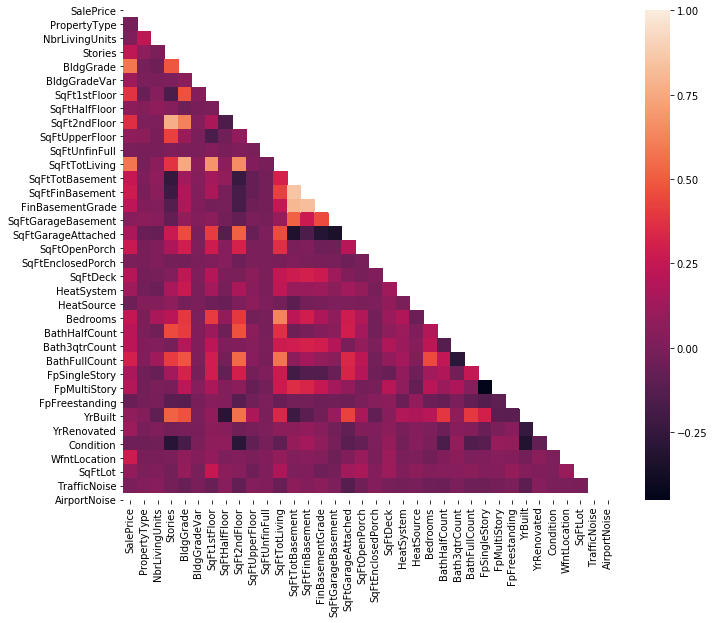

In [17]:
corr = dfAll.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

fig1, ax1 = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, ax=ax1);

In [18]:
dfAll.columns


Index(['MajorMinor', 'SalePrice', 'PropertyType', 'NbrLivingUnits', 'Address',
       'BuildingNumber', 'StreetName', 'StreetType', 'ZipCode', 'Stories',
       'BldgGrade', 'BldgGradeVar', 'SqFt1stFloor', 'SqFtHalfFloor',
       'SqFt2ndFloor', 'SqFtUpperFloor', 'SqFtUnfinFull', 'SqFtTotLiving',
       'SqFtTotBasement', 'SqFtFinBasement', 'FinBasementGrade',
       'SqFtGarageBasement', 'SqFtGarageAttached', 'DaylightBasement',
       'SqFtOpenPorch', 'SqFtEnclosedPorch', 'SqFtDeck', 'HeatSystem',
       'HeatSource', 'ViewUtilization', 'Bedrooms', 'BathHalfCount',
       'Bath3qtrCount', 'BathFullCount', 'FpSingleStory', 'FpMultiStory',
       'FpFreestanding', 'YrBuilt', 'YrRenovated', 'Condition', 'WfntLocation',
       'SqFtLot', 'TrafficNoise', 'AirportNoise', 'PowerLines',
       'OtherNuisances'],
      dtype='object')

In [ ]:
q3 = ("""
SELECT *
FROM dfAll
WHERE YrRenovated = 2019
""")
ps.sqldf(q3)



In [27]:
fsm_df = dfAll[['SalePrice','SqFtTotLiving']]
fsm_df.dropna(inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
fsm = ols(formula="SalePrice ~ SqFtTotLiving", data=fsm_df).fit()

In [29]:
fsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                 1.039e+04
Date:                Tue, 03 Mar 2020   Prob (F-statistic):               0.00
Time:                        09:40:38   Log-Likelihood:            -2.8940e+05
No. Observations:               19911   AIC:                         5.788e+05
Df Residuals:                   19909   BIC:                         5.788e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.242e+04   8487.811      1.464      0.143   -4214.409    2.91e+04
SqFtTotLiving   367.7104      3.607    101.951      0.000     360.641     374.780
==============================================================================
Omnibus:                    28886.705   Durbin-Watson:                   1.768
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         26563526.276
Skew:                           8.374   Prob(JB):                         0.00
Kurtosis:                     181.152   Cond. No.                     5.67e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
qp = ("""
SELECT SalePrice,
CASE
    WHEN SqFtOpenPorch > 0 OR SqFtEnclosedPorch > 0 OR SqFtDeck > 0 THEN 1
    ELSE 0
END AS porch
FROM dfAll
""")
fsm2_df = ps.sqldf(qp)

In [54]:
fsm2_df

,SalePrice,porch
0,560000,1
1,435000,1
2,775000,0
3,648500,0
4,1255000,1
...,...,...
19906,700988,1
19907,1550000,1
19908,930000,0
19909,695000,1


In [58]:
fsm2 = ols(formula="SalePrice ~ porch", data=fsm2_df).fit()

In [59]:
fsm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     449.5
Date:                Tue, 03 Mar 2020   Prob (F-statistic):           1.16e-98
Time:                        10:12:32   Log-Likelihood:            -2.9336e+05
No. Observations:               19911   AIC:                         5.867e+05
Df Residuals:                   19909   BIC:                         5.867e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     6.3e+05   9090.755     69.296      0.000    6.12e+05    6.48e+05
porch       2.187e+05   1.03e+04     21.200      0.000    1.98e+05    2.39e+05
==============================================================================
Omnibus:                    25954.408   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         10887237.754
Skew:                           7.024   Prob(JB):                         0.00
Kurtosis:                     116.692   Cond. No.                         4.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
qwf = ("""
SELECT SalePrice,
CASE
    WHEN WfntLocation > 0 THEN 1
    ELSE 0
END as wfnt
FROM dfAll
""")
fsm3_df = ps.sqldf(qwf)

In [77]:
fsm3_df['wfnt'].value_counts()

0    19578
1      333
Name: wfnt, dtype: int64

In [78]:
fsm3 = ols(formula="SalePrice ~ wfnt", data=fsm3_df).fit()
fsm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     2072.
Date:                Tue, 03 Mar 2020   Prob (F-statistic):               0.00
Time:                        11:33:17   Log-Likelihood:            -2.9260e+05
No. Observations:               19911   AIC:                         5.852e+05
Df Residuals:                   19909   BIC:                         5.852e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.753e+05   4168.731    185.974      0.000    7.67e+05    7.83e+05
wfnt        1.467e+06   3.22e+04     45.515      0.000     1.4e+06    1.53e+06
==============================================================================
Omnibus:                    22811.449   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6196782.639
Skew:                           5.614   Prob(JB):                         0.00
Kurtosis:                      88.693   Cond. No.                         7.80
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
qlp = ("""
SELECT SalePrice, (SqFtTotLiving/SqFtLot) AS lot_proportion

FROM dfAll
""")
lot_prop = ps.sqldf(qlp)
lot_prop

,SalePrice,lot_proportion
0,560000,0.183408
1,435000,0.267181
2,775000,0.292875
3,648500,0.628571
4,1255000,0.255238
...,...,...
19906,700988,0.322097
19907,1550000,0.187460
19908,930000,0.520000
19909,695000,0.609284


In [83]:
qcs = ("""
SELECT SalePrice, (SalePrice/SqFtTotLiving) AS cost_sqft
FROM dfAll
""")
ps.sqldf(qcs)


,SalePrice,cost_sqft
0,560000,290.155440
1,435000,220.253165
2,775000,372.596154
3,648500,196.515152
4,1255000,468.283582
...,...,...
19906,700988,251.250179
19907,1550000,404.699739
19908,930000,357.692308
19909,695000,275.793651


In [86]:
qall = ("""
SELECT SalePrice, (SalePrice/SqFtTotLiving) AS cost_sqft, (SqFtTotLiving/SqFtLot) AS lot_proportion,
CASE
    WHEN WfntLocation > 0 THEN 1
    ELSE 0
END as has_waterfront,
CASE
    WHEN SqFtOpenPorch > 0 OR SqFtEnclosedPorch > 0 OR SqFtDeck > 0 THEN 1
    ELSE 0
END AS has_porch
FROM dfAll

""")
ps.sqldf(qall)



,SalePrice,cost_sqft,lot_proportion,has_waterfront,has_porch
0,560000,290.155440,0.183408,0,1
1,435000,220.253165,0.267181,0,1
2,775000,372.596154,0.292875,0,0
3,648500,196.515152,0.628571,0,0
4,1255000,468.283582,0.255238,0,1
...,...,...,...,...,...
19906,700988,251.250179,0.322097,0,1
19907,1550000,404.699739,0.187460,0,1
19908,930000,357.692308,0.520000,0,0
19909,695000,275.793651,0.609284,0,1
